<a href="https://colab.research.google.com/github/danielturg/Road2_AI_Course_Scripts/blob/main/HW5_Road2_AI_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

write a code to get the Fashion MNIST Dataset. (i want 60k images in train and 10k in validation if that's not the default). i want you to then build a convolutional neural network with the following attributes: sequential, first layer is a conv2d layer with 32 kernels that are 3x3, padding = same, activation = relu, inputshape = (28, 28, 1).  then a max pooling 2d layer of 2x2 and stride =2. then another conv layer with 64 kernals, then another max pooling layer. then a flatten layer, then a dense layer with 128 neurons and activation = relu then finally a dense layer with 10 layers and activation = softmax. the network receives a 28 by 28 grayscale image and outputs a prediction of what fashion item it is out of the 10 classifications of the dataset.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension to the images (required for Conv2D)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the convolutional neural network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc}")


4422102/4422102 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                           

predicting from test set

1/1 [==============================] - 0s 84ms/step


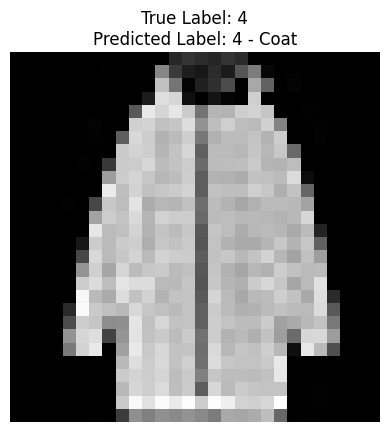

In [7]:
import matplotlib.pyplot as plt

# Choose an index from the Fashion MNIST dataset
image_index = 888  # You can change this index to any value between 0 and 59999

# Load the chosen image and preprocess it
input_image = x_test[image_index].reshape(1, 28, 28, 1)

#classes
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Make predictions
predictions = model.predict(input_image)

# Get the predicted class index and label
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Display the chosen image
plt.imshow(x_test[image_index].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {np.argmax(y_test[image_index])}\nPredicted Label: {predicted_class_index} - {predicted_class_label}")
plt.axis('off')
plt.show()
